This exploration of tweets on Donald Trump's Twitter account is inspired by David Robinson's 'Text analysis of Trump's tweets confirms he writes only the (angrier) Android half' (http://varianceexplained.org/r/trump-tweets/)

In [2]:
import os
import sys
import re

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
module_path = os.path.abspath(os.path.join('../code'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utilities import give_source_name, get_time, isQuote, plot_histogram,\
                      get_hashtags, analyze_hashtags,\
                      get_mentions, analyze_mentions, print_counter,\
                      clean_up_text, percent_words_all_caps

--------
#### Overview:
    
    1. Upload the data
    2. Looking at the source
    3. Looking at the timestamp
    4. Looking at quotes (Trump retweet)
    5. Looking at images, links and hashtags
    6. Looking at clean text of tweets
    7. Looking at re-tweets and favorite tweets
    
-----

## 1. Upload the data
This .csv file is obtained by running the api_script.py for realDonaldTrump

Overview of the structure of the repository:
 - code (all .py files)
 - data (all .csv files)
 - notebook (all .ipynb files)

In [4]:
df_trump = pd.read_csv('../data/realDonaldTrump.csv')

In [5]:
df_trump.columns

Index([u'id', u'created_at', u'retweeted', u'source', u'text', u'lang',
       u'favorite_count', u'retweet_count'],
      dtype='object')

## 2. Looking at the source

<b>TL;DR:</b> David Robinson reports that Donald Trump tends to use Android while his staff use iPhones. We will therefore label the tweets according to their sources (Android/iPhone, as others are a clear minority)

In [6]:
print 'number of unique sources: ', len(df_trump.source.unique())
source_types = df_trump.source.unique()
# human readable (shorter) labels
source_names = ['Web Client', 'iPhone', 'Android', 'iPad',\
                 'Media Studio', 'Instagram', 'Mobile Web']

number of unique sources:  7


In [7]:
#add a column with the human readable label
df_trump['type_source'] = map(lambda x: \
                        give_source_name(x, source_types, source_names),\
                        df_trump.source)

<IPython.core.display.Javascript object>


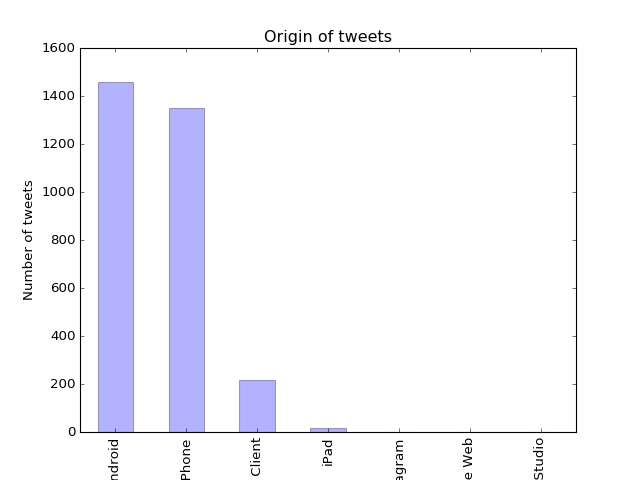

In [8]:
#looking at the number of tweets according to the source
plt.figure()
df_trump.type_source.value_counts().plot(kind='bar', alpha=0.3)
plt.title('Origin of tweets')
plt.ylabel('Number of tweets')
plt.xlabel('Source')
plt.show()

In [15]:
#making mask to id the source
mask_android = (df_trump.type_source == 'Android')
mask_iphone = (df_trump.type_source == 'iPhone')

## 3. Looking the timestamp

<b>TL-DR:</b> On Android, peaks around noon and good presence during the week-end. On iPhone, later in the day and stronger presence during the week

In [16]:
#create the timestamp
df_trump['date_object'] = map(get_time, df_trump.created_at)

In [17]:
#day of week
df_trump['dow'] = map(lambda x: x.weekday(), df_trump.date_object)
#hours
df_trump['hour'] = map(lambda x: x.hour, df_trump.date_object)
#weekend tweet
df_trump['isWeekend'] = map(lambda x: (x == 5 or x == 6), df_trump.dow)

#### by hour

In [18]:
hour_android = df_trump.hour[mask_android]
hour_iphone = df_trump.hour[mask_iphone]

num_android = len(hour_android)
num_iphone = len(hour_iphone)

percent_tweet_android = hour_android.value_counts()*100./num_android
percent_tweet_iphone = hour_iphone.value_counts()*100./num_iphone

<IPython.core.display.Javascript object>


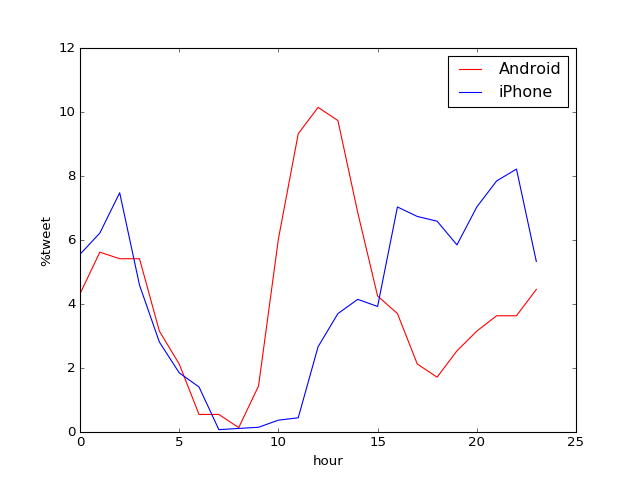

In [19]:
plt.figure()
plt.plot(percent_tweet_android.sort_index(), c='r', label='Android')
plt.plot(percent_tweet_iphone.sort_index(), c='b', label='iPhone')
plt.xlabel('hour')
plt.ylabel('%tweet')
plt.legend()
plt.show()

#### by weekday

In [20]:
dow_android = df_trump.dow[mask_android]
dow_iphone = df_trump.dow[mask_iphone]

num_android = len(dow_android)
num_iphone = len(dow_iphone)

percent_tweet_android = dow_android.value_counts()*100./num_android
percent_tweet_iphone = dow_iphone.value_counts()*100./num_iphone

<IPython.core.display.Javascript object>


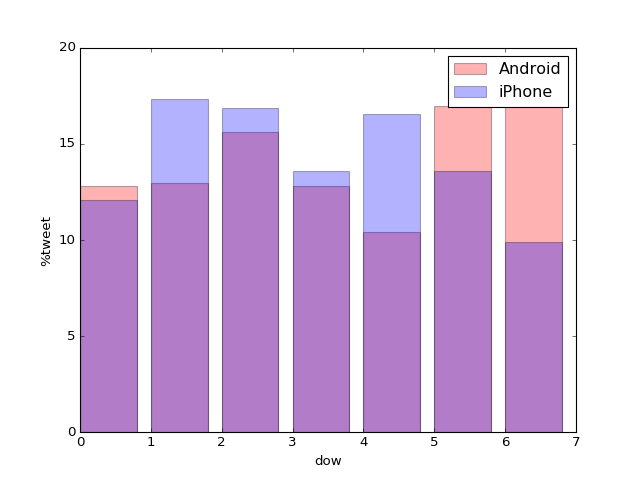

In [21]:
plt.figure()
plt.bar(range(7), percent_tweet_android.sort_index(), color='r', alpha=0.3, label='Android')
plt.bar(range(7), percent_tweet_iphone.sort_index(), color='b', alpha=0.3, label='iPhone')
plt.xlabel('dow')
plt.ylabel('%tweet')
plt.legend()
plt.show()

## 4. Looking at quote (retweet)

<b>TL-DR:<\b> On Android, a significant postions of tweets are entire quotes. These are D. Trumps way of retweeting

In [22]:
df_trump["isQuote"] = map(isQuote, df_trump.text)

<IPython.core.display.Javascript object>


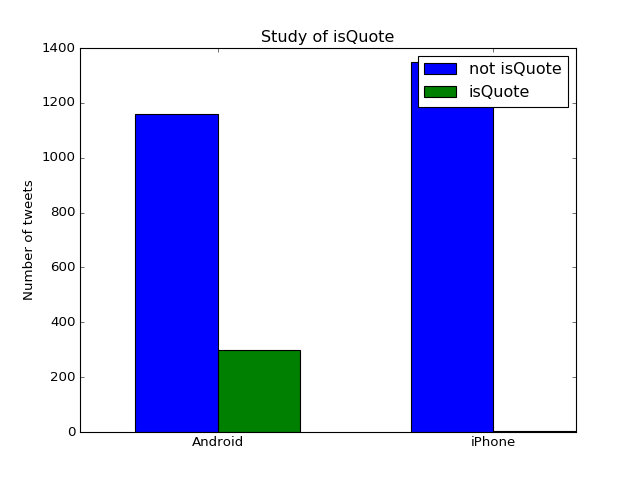

Android (False/True):  1159 300
iPhone (False/True):  1348 3


In [23]:
plot_histogram(df_trump, 'isQuote', mask_android, mask_iphone)

In [28]:
#define a mask to seperate tweets that are retweets from others
mask_android_noquote = ((df_trump.type_source == 'Android') & (df_trump.isQuote==False))
mask_android_isquote = ((df_trump.type_source == 'Android') & (df_trump.isQuote==True))

## 5. Looking at images, links and hashtags

<b>TL-DR: </b> On Android there are fewer tweets with links and hashtags. On iPhone, the majority of tweets have links and half have hashtags

In [24]:
df_trump['has_links'] = map(lambda text: (len(re.findall('https', text))>0), df_trump.text)
df_trump['has_hashtag'] = map(lambda text: (len(re.findall('#', text))>0), df_trump.text)

<IPython.core.display.Javascript object>


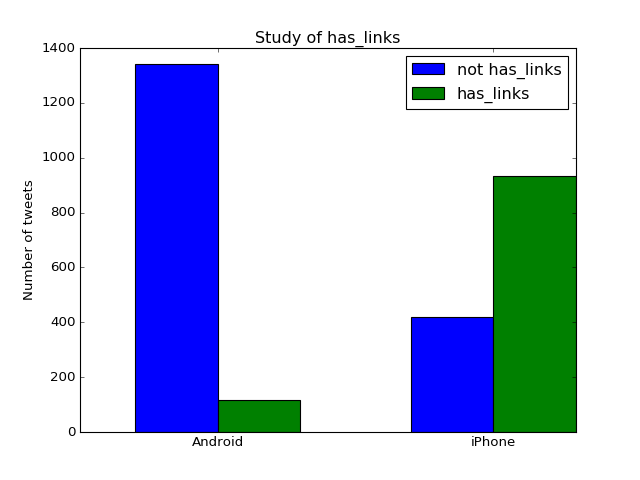

Android (False/True):  1341 118
iPhone (False/True):  419 932


In [25]:
plot_histogram(df_trump, 'has_links', mask_android, mask_iphone)

<IPython.core.display.Javascript object>


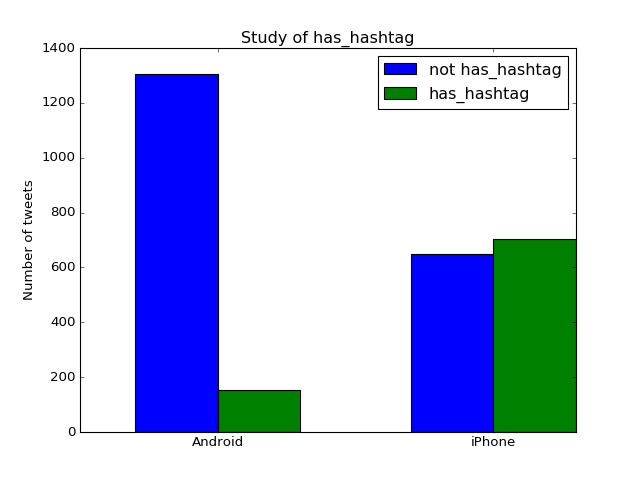

Android (False/True):  1306 153
iPhone (False/True):  648 703


In [42]:
plot_histogram(df_trump, 'has_hashtag', mask_android, mask_iphone)

In [26]:
df_trump['hashtags'] = map(get_hashtags, df_trump.text)
df_trump['mentions'] = map(get_mentions, df_trump.text)

#### hashtags

In [29]:
count_android_noquote = analyze_hashtags(df_trump, mask_android_noquote)
print_counter(count_android_noquote, min_count=2)

#Trump2016 :  9
#MAGA :  8
#MakeAmericaGreatAgain :  7
#Trump :  5
#NeverHillary :  3
#VoteTrump :  3
#TrumpTrain :  3


In [30]:
count_android_isquote = analyze_hashtags(df_trump, mask_android_isquote)
print_counter(count_android_isquote, min_count=2)

#MakeAmericaGreatAgain :  19
#Trump2016 :  12
#TrumpTrain :  8
#MAGA :  5
#GOPDebate :  4
#POTUS :  3
#VoteTrump :  3


In [31]:
count_iphone= analyze_hashtags(df_trump, mask_iphone)
print_counter(count_iphone, min_count=2)

#Trump2016 :  270
#MakeAmericaGreatAgain :  195
#AmericaFirst :  68
#MAGA :  53
#VoteTrump :  51
#ImWithYou :  49
#TrumpPence16 :  23
#CrookedHillary :  21
#FITN :  21
#TrumpTrain :  18
#GOPDebate :  17
#IACaucus :  17
#SuperTuesday :  17
#WIPrimary :  12
#VPDebate :  12
#RNCinCLE :  10
#INPrimary :  10
#CaucusForTrump :  10
#BigLeagueTruth :  9
#VoteTrumpSC :  9
#NYPrimary :  8
#VoteTrumpNH :  8
#DebateNight :  8
#NHPrimary :  7
#GOPConvention :  5
#VoteTrumpNV :  5
#TrumpRally :  5
#SCPrimary :  5
#MakeAmericaSafeAgain :  5
#LESM :  4
#ICYMI :  4
#2A :  4
#NevadaCaucus :  4
#NewYorkValues :  4
# :  3
#VoteTrumpMI :  3
#AZPrimary :  3
#Debates2016 :  3
#ObamaCare :  3
#FollowTheMoney :  3


#### mentions

In [32]:
mentions_android_noquote = analyze_mentions(df_trump, mask_android_noquote)
print_counter(mentions_android_noquote, min_count=2)

@realDonaldTrump :  111
@CNN :  54
@FoxNews :  48
@nytimes :  27
@foxandfriends :  25
@megynkelly :  21
@Morning_Joe :  15
@oreillyfactor :  11
@seanhannity :  8
@WSJ :  7
@morningmika :  6
@mike_pence :  6
@tedcruz :  5
@greta :  4
@bobvanderplaats :  4
@TODAYshow :  4
@DiamondandSilk :  4
@MarkHalperin :  4
@JebBush :  4
@meetthepress :  4
@brithume :  3
@RepTomMarino :  3
@FoxBusiness :  3
@elizabethforma :  3
@AC360 :  3
@marcorubio :  3
@NewDay :  3
@NBCNews :  3
@donlemon :  3
@ABC :  3
@JoeNBC :  3
@BenSasse :  3
@MariaBartiromo :  3


In [33]:
mentions_android_isquote = analyze_mentions(df_trump, mask_android_isquote)
print_counter(mentions_android_isquote, min_count=2)

@realDonaldTrump :  163
@megynkelly :  25
@CNN :  10
@JoeNBC :  8
@tedcruz :  8
@FoxNews :  7
@AnnCoulter :  5
@ericnlin :  4
@BertShad :  4
@AC360 :  4
@DavidWohl :  4
@foxandfriends :  4
@ukcatwoman52 :  3
@newtgingrich :  3
@DanScavino :  3
@FaceTheNation :  3
@Susiesentinel :  3
@laurencristmann :  3
@gene70 :  3
@bobvanderplaats :  3
@YouTube :  3
@ahernandez85a :  3


In [34]:
mentions_iphone = analyze_mentions(df_trump, mask_iphone)
print_counter(mentions_iphone, min_count=2)

@FoxNews :  24
@CNN :  13
@oreillyfactor :  12
@Mike_Pence :  11
@ :  10
@SeanHannity :  10
@IvankaTrump :  9
@EricTrump :  8
@DonaldJTrumpJr :  7
@MELANIATRUMP :  7
@nytimes :  6
@HillaryClinton :  6
@NYDailyNews :  5
@KarlRove :  5
@foxandfriends :  5
@greta :  5
@NYTimes :  5
@JerryJrFalwell :  4
@megynkelly :  4
@TrumpTurnberry :  4
@RealBenCarson :  4
@TrumpScotland :  4
@seanhannity :  4
@realDonaldTrump :  4
@Reince :  3
@NRA :  3
@timkaine :  3
@FaceTheNation :  3
@MittRomney :  3
@GOP :  3
@mike_pence :  3


## 6. Looking at clean text of tweets

<b>TL-DR:</b> Investigation into all words written in capital letters, where there is no clear cut conclusion (a few more in Trump's tweets than his staff). Investigation into length of tweet (without text, hashtag...): unsurprisingly, tweets on Android are longer and tend to use up almost all of the 140 characters. Tweets on iPhone are globally smaller, but are more uniformly distributed

In [35]:
df_trump['no_hashtags_no_links'] = map(clean_up_text, df_trump.text)

#### All caps words

In [36]:
df_trump['percent_all_caps_words'] = map(percent_words_all_caps,\
                                         df_trump['no_hashtags_no_links'])

<IPython.core.display.Javascript object>


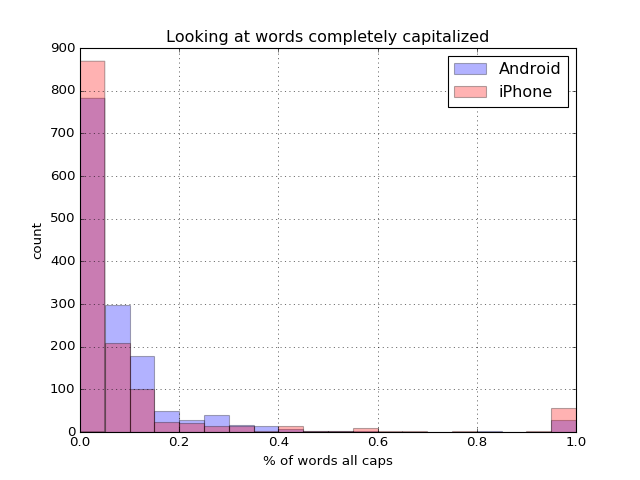

In [37]:
plt.figure()
x_min = 0
x_max = 1
df_trump[mask_android].percent_all_caps_words.hist(alpha=0.3, bins=20, label='Android')
df_trump[mask_iphone].percent_all_caps_words.hist(alpha=0.3, bins=20, color='r', label='iPhone')
plt.legend()
plt.xlabel('% of words all caps')
plt.ylabel('count')
plt.title('Looking at words completely capitalized')

<IPython.core.display.Javascript object>


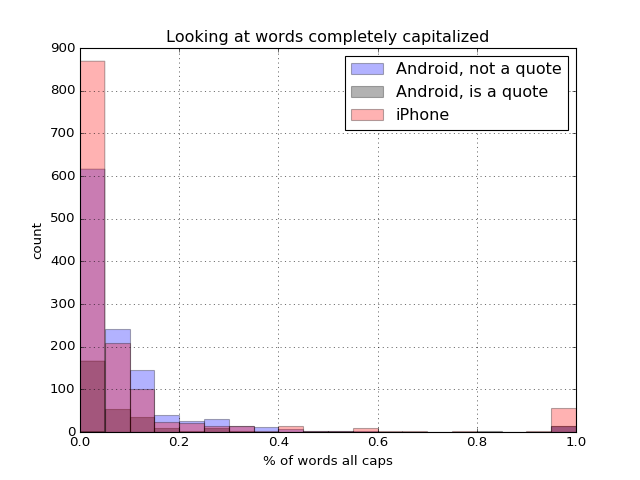

In [38]:
#looking more in detail
plt.figure()
x_min = 0
x_max = 1
df_trump[mask_android_noquote].percent_all_caps_words.hist(alpha=0.3, bins=20, label='Android, not a quote')
df_trump[mask_android_isquote].percent_all_caps_words.hist(alpha=0.3, bins=20, color='k', label='Android, is a quote')
df_trump[mask_iphone].percent_all_caps_words.hist(alpha=0.3, bins=20, color='r', label='iPhone')
plt.legend()
plt.xlabel('% of words all caps')
plt.ylabel('count')
plt.title('Looking at words completely capitalized')

#### Length of real message

In [39]:
df_trump['len_clean_text'] = map(len, df_trump['no_hashtags_no_links'])

<IPython.core.display.Javascript object>


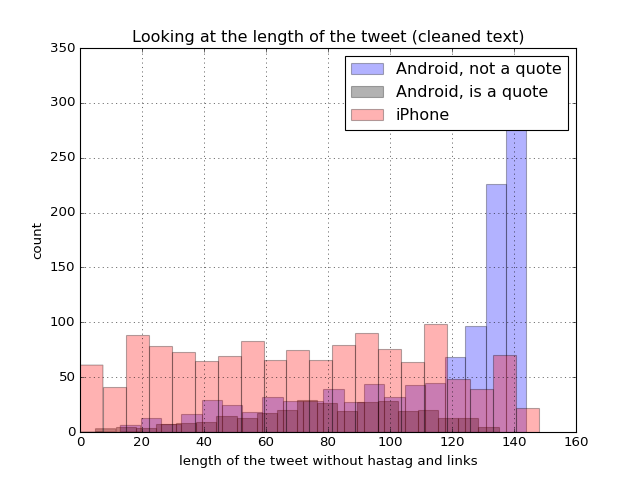

In [40]:
plt.figure()
x_min = 0
x_max = 1
df_trump[mask_android_noquote].len_clean_text.hist(alpha=0.3, bins=20, label='Android, not a quote')
df_trump[mask_android_isquote].len_clean_text.hist(alpha=0.3, bins=20, color='k', label='Android, is a quote')
df_trump[mask_iphone].len_clean_text.hist(alpha=0.3, bins=20, color='r', label='iPhone')
plt.legend()
plt.xlabel('length of the tweet without hastag and links')
plt.ylabel('count')
plt.title('Looking at the length of the tweet (cleaned text)')

## 7. Looking at re-tweets and favorite tweets
<b>TL-DR:</b> There is no clear pattern in the distribution of number of times a message is re-tweeted or marked as a favorite.

In [41]:
df_trump.columns

Index([u'id', u'created_at', u'retweeted', u'source', u'text', u'lang',
       u'favorite_count', u'retweet_count', u'type_source', u'date_object',
       u'dow', u'hour', u'isWeekend', u'isQuote', u'has_links', u'has_hashtag',
       u'hashtags', u'mentions', u'no_hashtags_no_links',
       u'percent_all_caps_words', u'len_clean_text'],
      dtype='object')

<IPython.core.display.Javascript object>


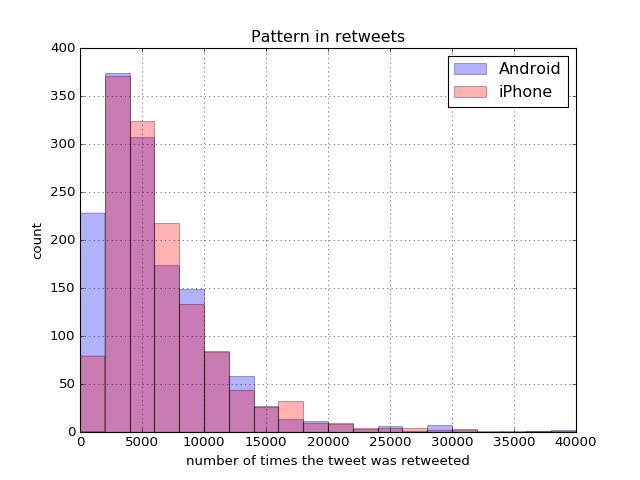

In [45]:
fig, ax = plt.subplots()
x_min = 0
x_max = 40000
ax.set_xlim([x_min, x_max])
df_trump[mask_android].retweet_count.hist(alpha=0.3, bins=20, range=(x_min, x_max), label='Android', ax=ax)
df_trump[mask_iphone].retweet_count.hist(alpha=0.3, bins=20, range=(x_min, x_max), color='r', label='iPhone', ax=ax)
plt.legend()
plt.xlabel('number of times the tweet was retweeted')
plt.ylabel('count')
plt.title('Pattern in retweets')

<IPython.core.display.Javascript object>


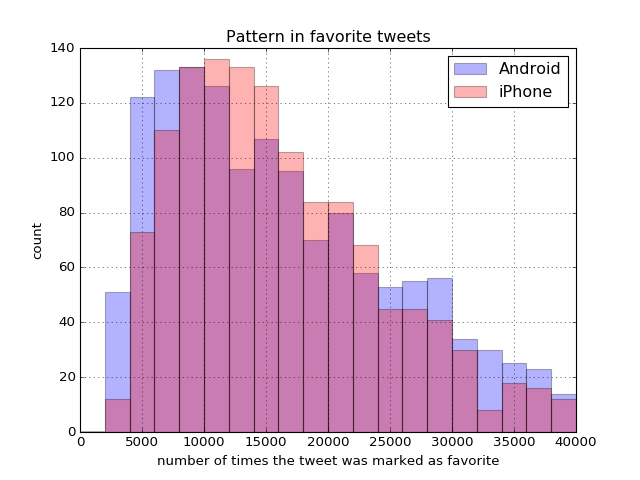

In [46]:
fig, ax = plt.subplots()
x_min = 0
x_max = 40000
ax.set_xlim([x_min, x_max])
df_trump[mask_android].favorite_count.hist(alpha=0.3, bins=20, range=(x_min, x_max), label='Android', ax=ax)
df_trump[mask_iphone].favorite_count.hist(alpha=0.3, bins=20, range=(x_min, x_max), color='r', label='iPhone', ax=ax)
plt.legend()
plt.xlabel('number of times the tweet was marked as favorite')
plt.ylabel('count')
plt.title('Pattern in favorite tweets')